In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
base_dataset=pd.read_csv("E:\\Backup\\house-prices-advanced-regression-techniques (2)\\train.csv")

In [6]:
base_dataset.shape

(1460, 81)

In [7]:
base_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Null Values Treatement

In [9]:
null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100

retained_columns=null_value_table[null_value_table<30].index
drop_columns=null_value_table[null_value_table>30].index

base_dataset.drop(drop_columns,axis=1,inplace=True)

len(base_dataset.isna().sum().index)

cont=base_dataset.describe().columns

cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]

for i in cat:
    base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)

for i in cont:
    base_dataset[i].fillna(base_dataset[i].median(),inplace=True)

In [10]:
base_dataset.isna().sum().head()

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
dtype: int64

#### Outlier Treatement

In [11]:
base_dataset.var().sort_values(ascending=False).index[1:10]

Index(['LotArea', 'GrLivArea', 'MiscVal', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'Id', '1stFlrSF'],
      dtype='object')

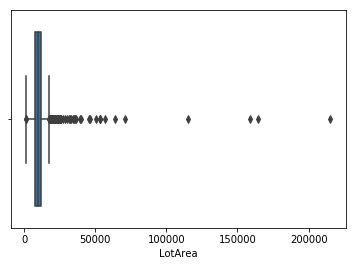

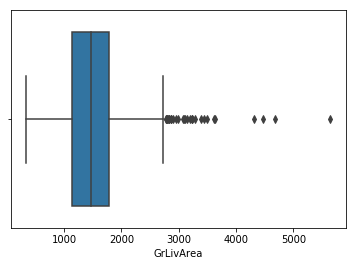

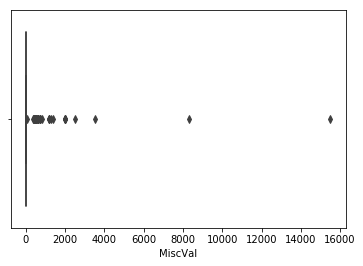

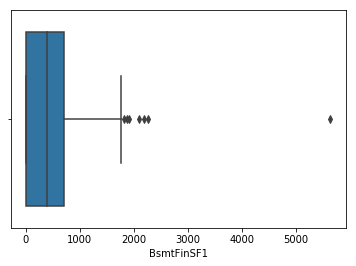

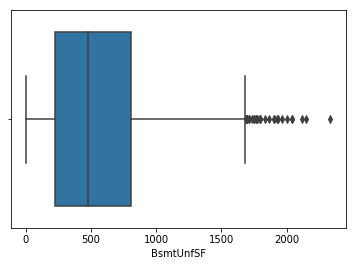

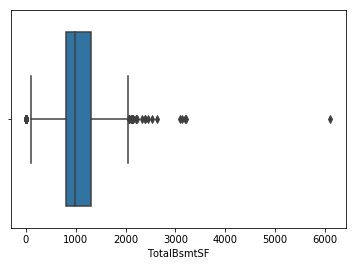

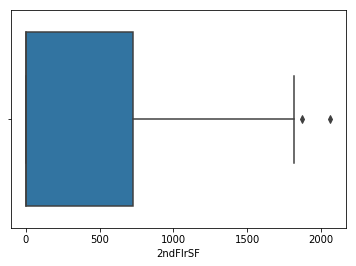

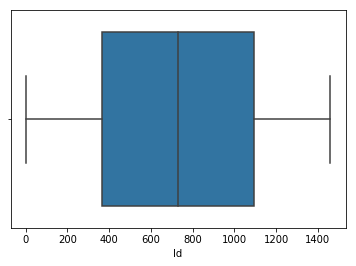

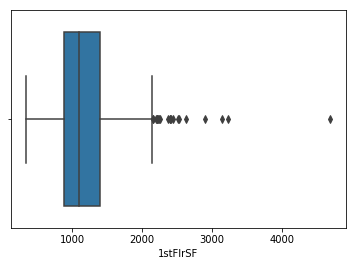

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in base_dataset.var().sort_values(ascending=False).index[1:10]:
    sns.boxplot(base_dataset[i])
    plt.show()

In [13]:
for i in base_dataset.var().sort_values(ascending=False).index[1:10]:
    x=np.array(base_dataset[i])
    qr1=np.quantile(x,0.25)
    qr3=np.quantile(x,0.75)
    iqr=qr3-qr1
    utv=qr3+(1.5*(iqr))
    ltv=qr1-(1.5*(iqr))
    y=[]
    for p in x:
        if p <ltv or p>utv:
            y.append(np.median(x))
        else:
            y.append(p)
    base_dataset[i]=y

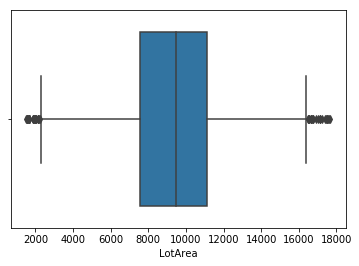

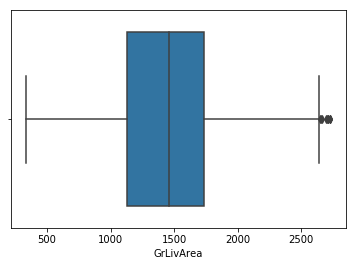

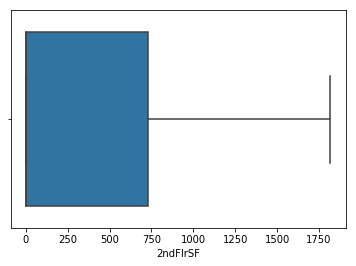

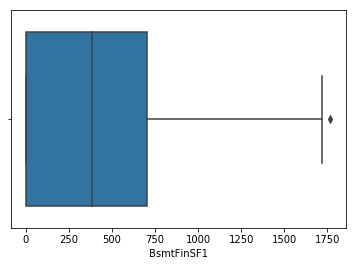

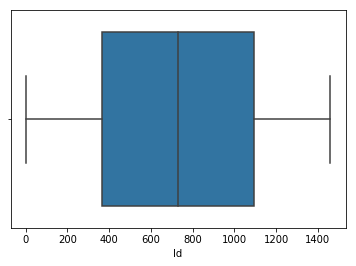

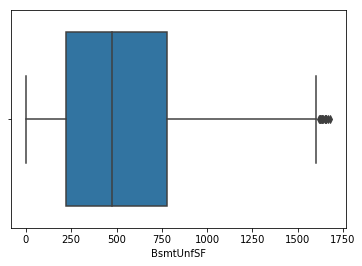

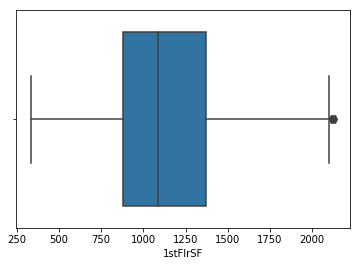

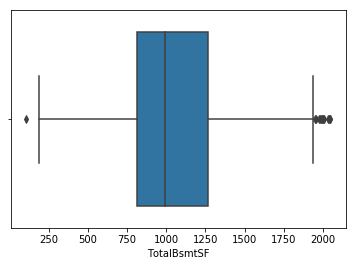

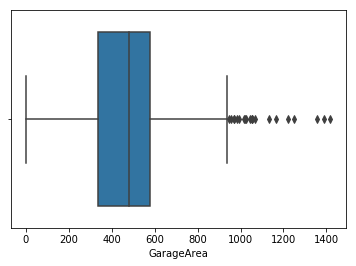

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in base_dataset.var().sort_values(ascending=False).index[1:10]:
    sns.boxplot(base_dataset[i])
    plt.show()

#### label Encoder Treatement

In [15]:
from sklearn.preprocessing import LabelEncoder
for i in cat:
    le=LabelEncoder()
    le.fit(base_dataset[i])
    x=le.transform(base_dataset[i])
    base_dataset[i]=x

In [16]:
len(base_dataset.columns)

76

In [17]:
len(base_dataset.mean().index)

76

In [18]:
base_dataset.drop('Id',axis=1,inplace=True)

In [19]:
### Univariate Analysis

(array([ 57.,  77., 105., 186., 392., 287., 181.,  96.,  45.,  34.]),
 array([ 1491.,  3109.,  4727.,  6345.,  7963.,  9581., 11199., 12817.,
        14435., 16053., 17671.]),
 <a list of 10 Patch objects>)

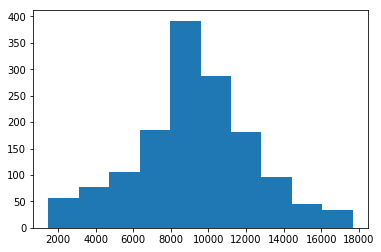

In [20]:
plt.hist(base_dataset['LotArea'])

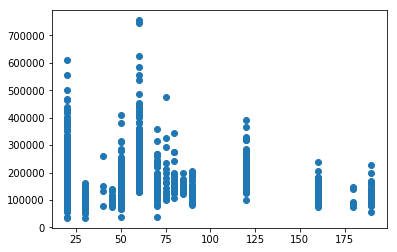

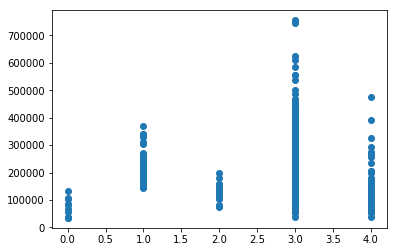

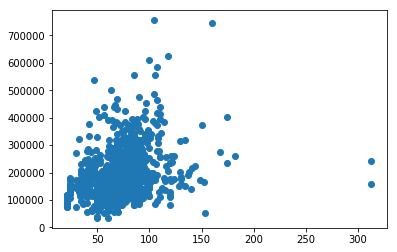

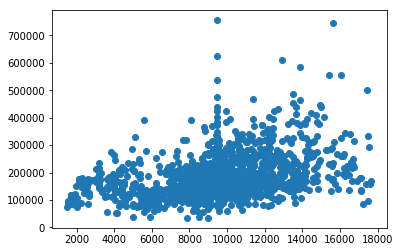

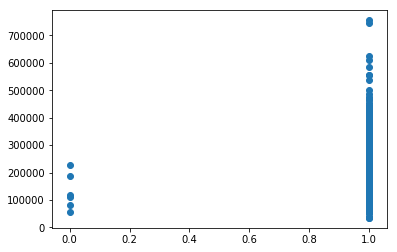

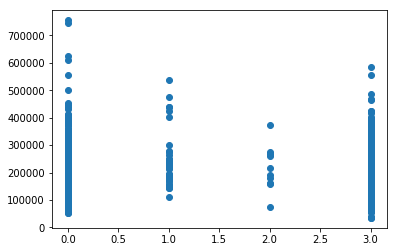

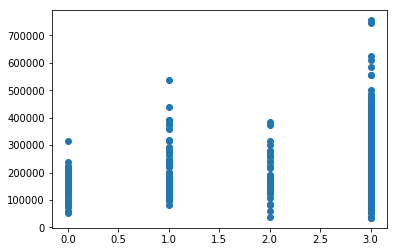

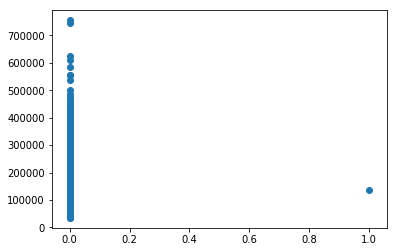

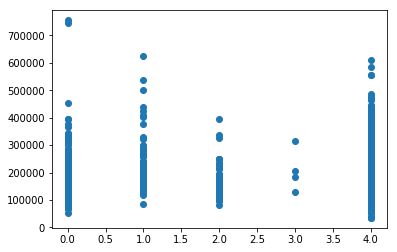

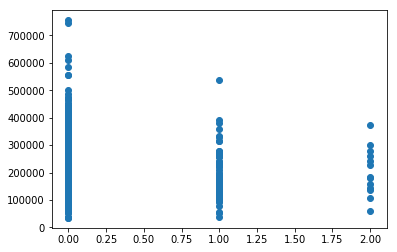

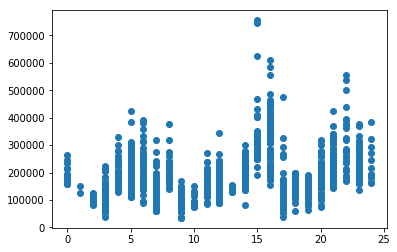

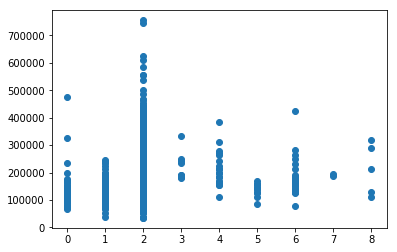

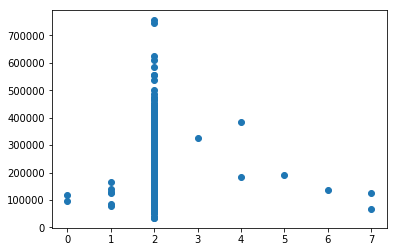

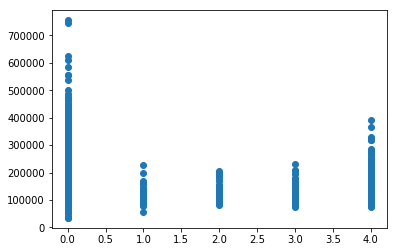

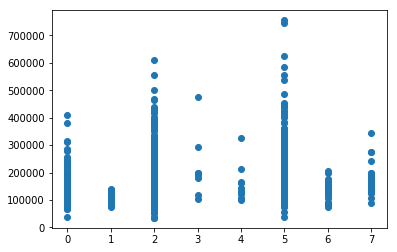

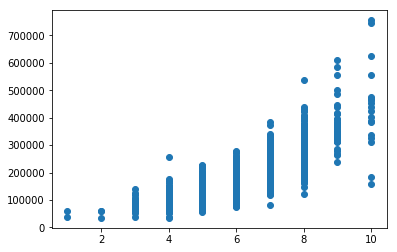

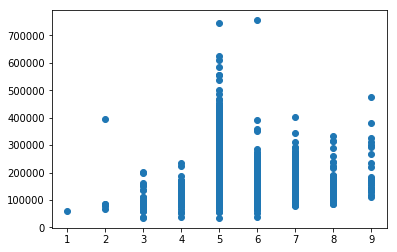

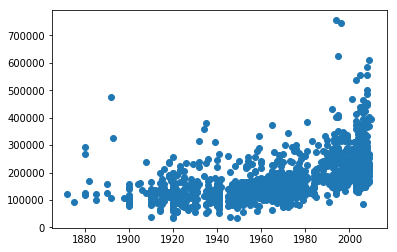

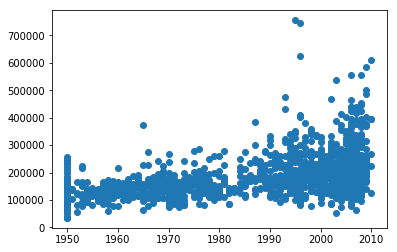

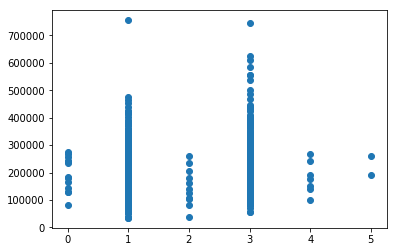

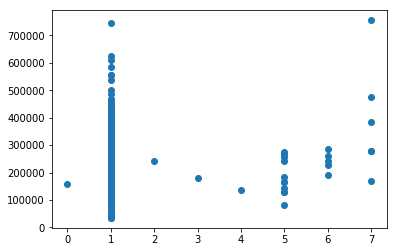

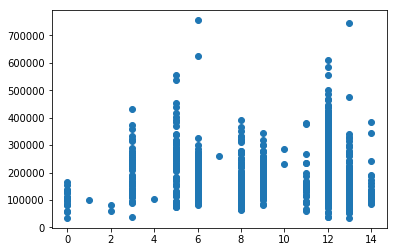

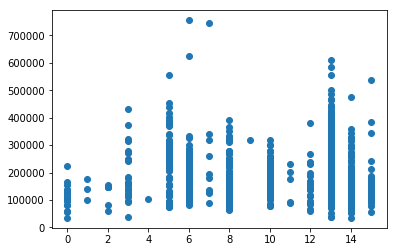

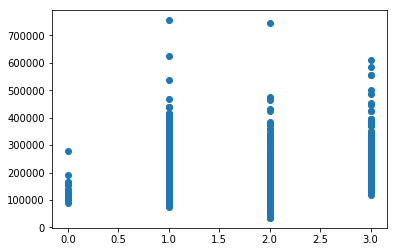

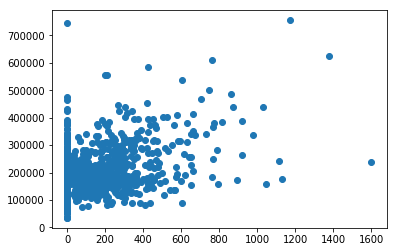

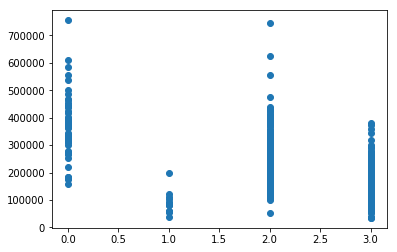

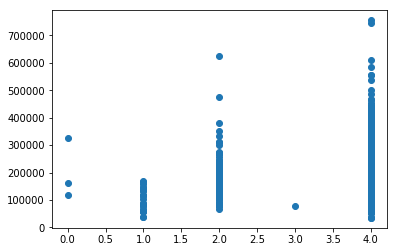

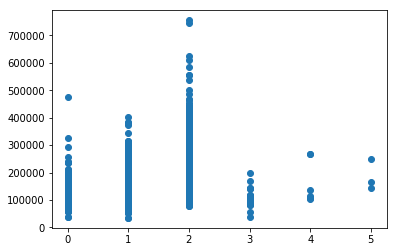

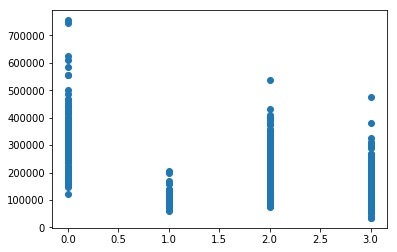

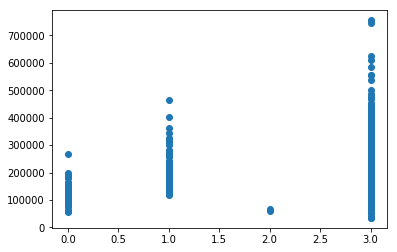

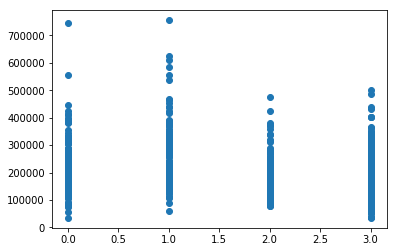

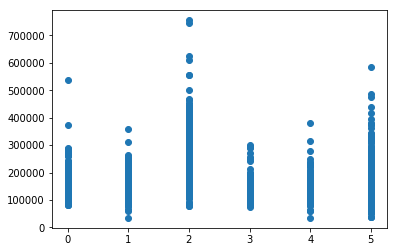

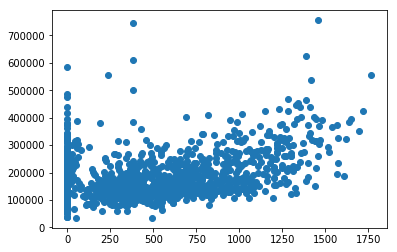

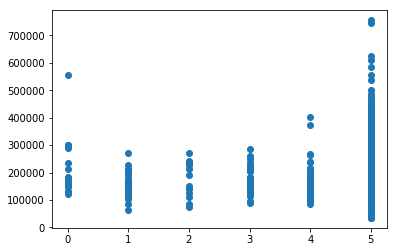

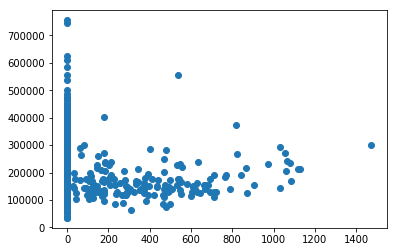

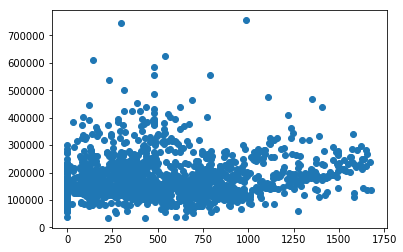

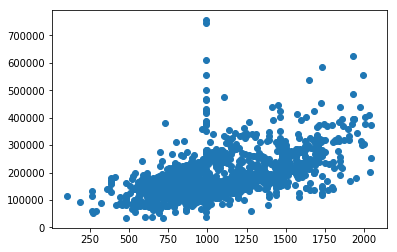

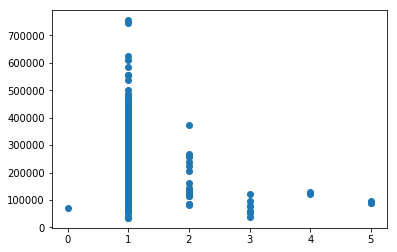

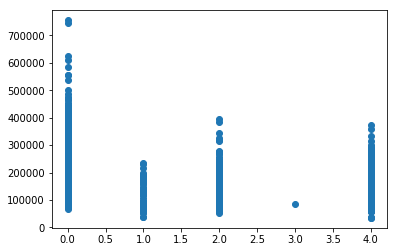

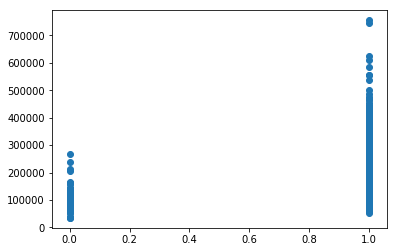

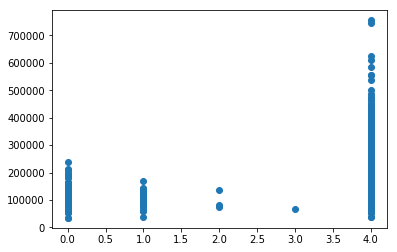

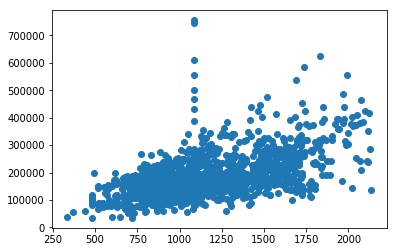

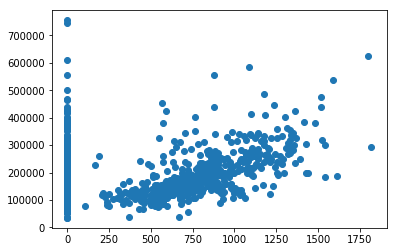

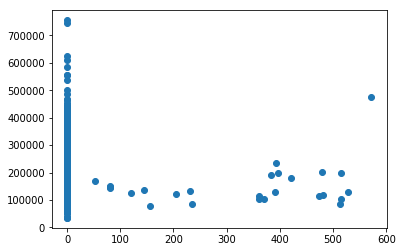

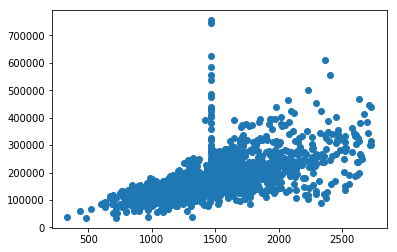

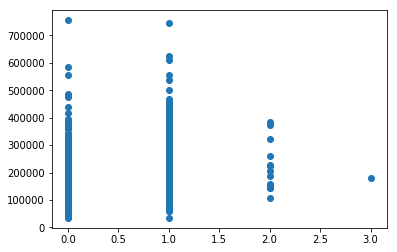

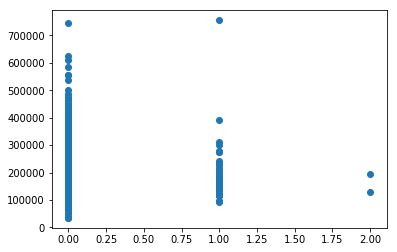

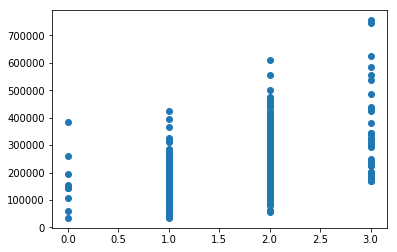

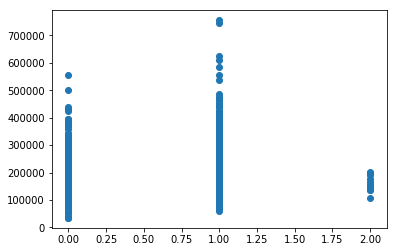

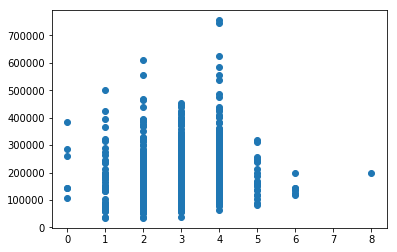

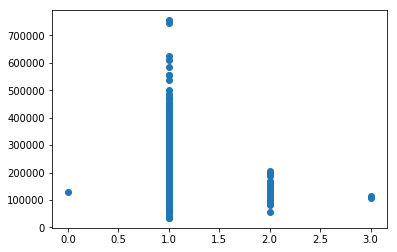

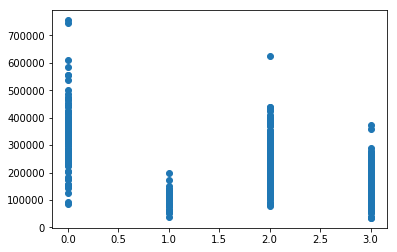

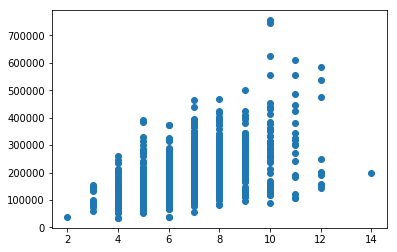

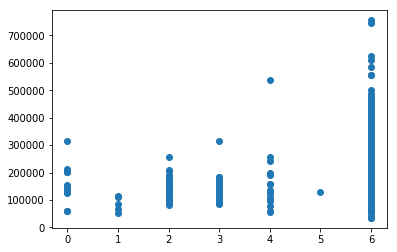

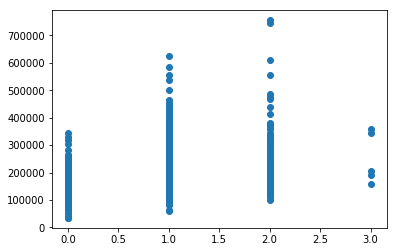

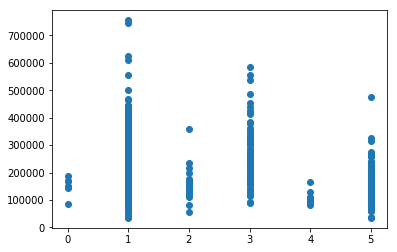

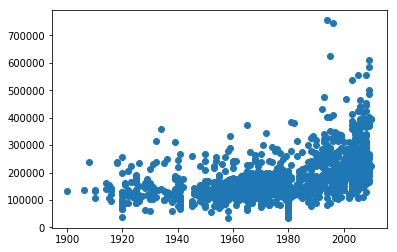

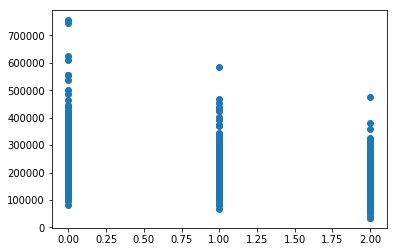

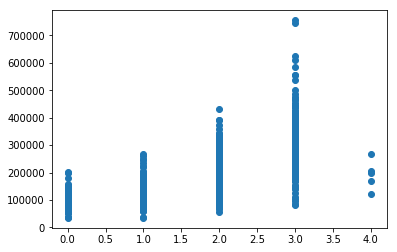

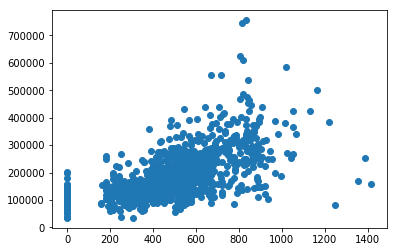

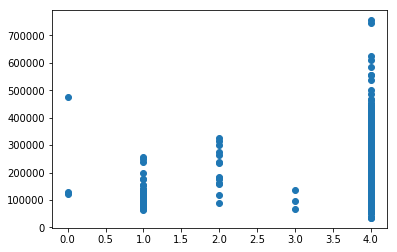

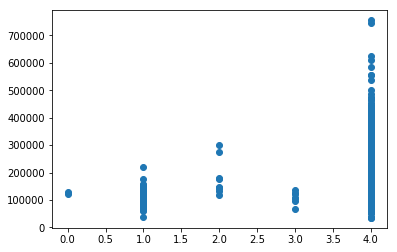

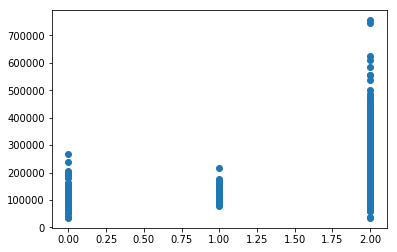

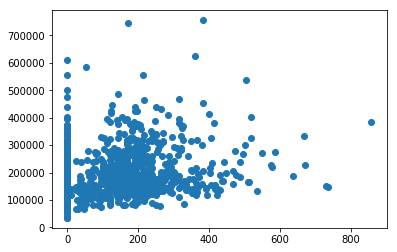

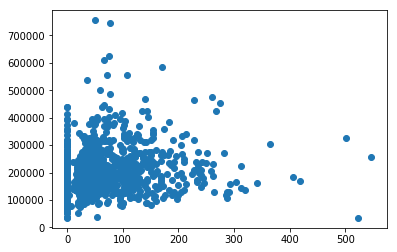

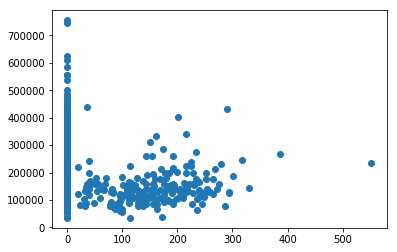

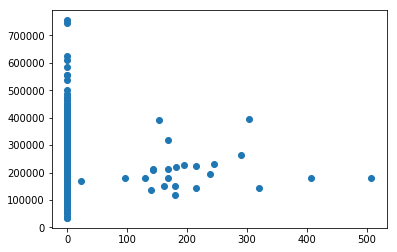

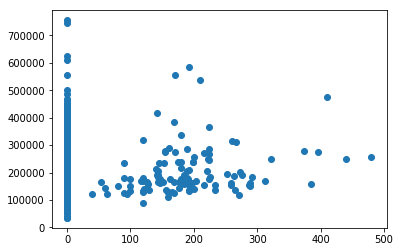

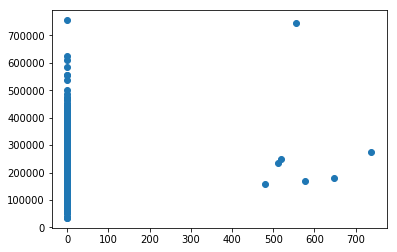

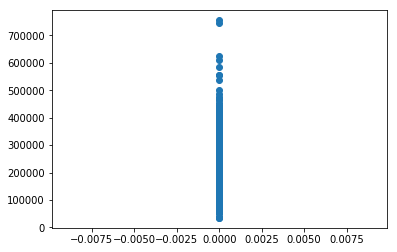

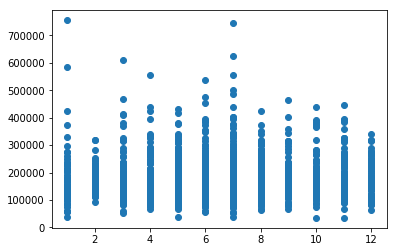

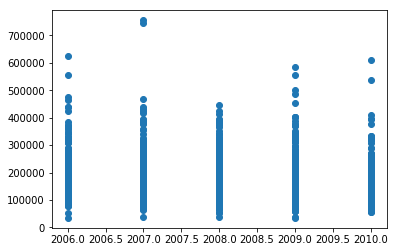

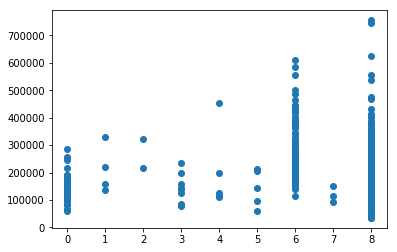

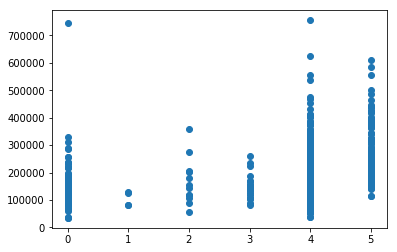

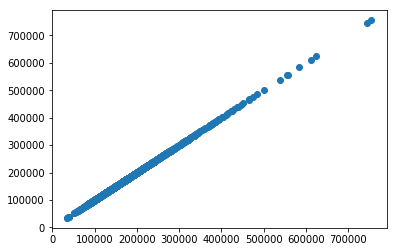

In [21]:
for i in base_dataset.columns:
    plt.scatter(base_dataset[i],base_dataset['SalePrice'])
    plt.show()

#### Model Building

In [22]:
y=base_dataset['SalePrice']
x=base_dataset.drop('SalePrice',axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=121)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 74) (292, 74) (1168,) (292,)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(X_train,y_train)
ln.predict(X_test)[1:10]

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,ln.predict(X_test)))

from sklearn.metrics import r2_score
print(r2_score(y_test,ln.predict(X_test)))

from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_test,ln.predict(X_test)))

(1168, 74) (292, 74) (1168,) (292,)
20535.490846476492
0.8722110752715097
20535.490846476492


In [25]:
(abs(ln.predict(X_test)-y_test.values).sum())/X_test.shape[0]

20535.490846476492

In [26]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,ln.predict(X_test)))

20535.490846476492


In [27]:
from sklearn.metrics import r2_score
print(r2_score(y_test,ln.predict(X_test)))

0.8722110752715097


In [28]:
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_test,ln.predict(X_test)))

20535.490846476492


In [29]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_absolute_error(y_test,ln.predict(X_test))))

143.30209644829517


In [30]:
pd.DataFrame(ln.coef_,X_test.columns)[0].sort_values().head()

KitchenAbvGr   -25799.851008
ExterQual       -9542.055848
Condition2      -8491.751509
BsmtQual        -7757.536041
KitchenQual     -7736.226466
Name: 0, dtype: float64

In [31]:
pd.DataFrame(ln.coef_,X_test.columns)[0].sort_values().tail()

HalfBath        9492.916573
OverallQual    11533.916178
LandSlope      11942.574380
FullBath       13130.568114
Street         36139.942130
Name: 0, dtype: float64

#### Regularization concepts : To predict with high accuracy for test data

In [34]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(clf.predict(X_test),y_test)

20438.20340862553